In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Path to the PASCAL VOC dataset folder
VOC_ROOT_DIR = r'C:\Users\Sindhu\Downloads\VOCtrainval_11-May-2012\VOCdevkit\VOC2012'

def load_data(image_set='train'):
    with open(os.path.join(VOC_ROOT_DIR, 'ImageSets', 'Segmentation', image_set + '.txt'), 'r') as f:
        image_names = f.read().splitlines()
    images = [Image.open(os.path.join(VOC_ROOT_DIR, 'JPEGImages', name + '.jpg')) for name in image_names]
    annotations = [Image.open(os.path.join(VOC_ROOT_DIR, 'SegmentationClass', name + '.png')) for name in image_names]
    return images, annotations



def plot_image_and_annotation(image, annotation):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(image)
    ax[1].imshow(annotation)
    plt.show()

    

def calculate_iou(prediction, ground_truth):
    intersection = np.logical_and(prediction, ground_truth)
    union = np.logical_or(prediction, ground_truth)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score


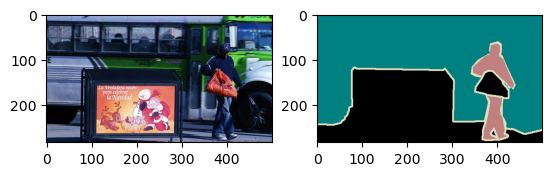

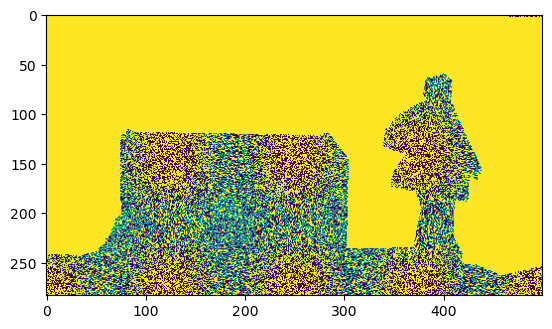

IoU score: 0.7531771899239496


In [2]:

# Load the data
images, annotations = load_data()

# Randomly select an image and its annotation
index = np.random.choice(len(images))
image, annotation = images[index], annotations[index]

# Plot the image and its annotation
plot_image_and_annotation(image, annotation)

# Convert the annotation to a numpy array
annotation_np = np.array(annotation)

# Get the unique classes in the annotation (excluding the background class 0)
classes = np.unique(annotation_np)
classes = classes[classes != 0]

# Choose a random class (excluding the background class 0)
random_class = np.random.choice(classes)

# Generate a random binary mask for the chosen class
prediction = np.random.choice([0, 1], size=annotation_np.shape)
# Set the pixels belonging to the chosen class in the prediction to 1
prediction[annotation_np == random_class] = 1

# Plot the random mask
plt.imshow(prediction)
plt.show()

# Calculate the IoU score
iou_score = calculate_iou(prediction, annotation_np)

print(f'IoU score: {iou_score}')